In this notebook, RNN estimator is used as a reference model.
This choice is leaded by the fact that :

<pre>
<li>NN model are non-linear models, then it is supposed to capture non-linear relations in between features </li>
<li>RNN model provides results more efficiently considering time criteria.</li>
</pre>

Multiple dataset are used in order to benchmark assumptions forged about model.  

GRU NN uses few parameters. 

    Then IBFGS may be used rather then SGD for descent algorithm.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import time

import tensorflow as tf
import pandas as pd
import gensim

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


import p8_util
import p8_util_config
import p9_util

import p5_util

extension='_part'



W0817 23:46:17.096063 140212248663872 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0817 23:46:17.097084 140212248663872 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/adanet/tf_compat/__init__.py:96: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.

Using TensorFlow backend.
W0817 23:46:17.309130 140212248663872 deprecation_wrapper.py:119] From /home/bangui/Dropbox/Perso/Formation/openclassrooms/OC_Datascientist/Kaggle/p8_util_config.py:137: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.



In [ ]:
import numpy as np

def reg_2_label_row(y,coeff) :
    y_label = np.round(y*coeff, 0)
    y_label = y_label.astype(int)
    return y_label

def multivalue2_binary(y, threshold, direction) :
    if direction == -1 :
        y_bin = np.where(y<threshold,1,0)
    elif direction == 0:
        y_bin = np.where(y==threshold,1,0)
    else :
         y_bin = np.where(y>threshold,1,0)
    return y_bin


In [ ]:
OUTPUT_DIR = './tmp/baseline'
OUTPUT_DIR_TB = './tmp'
is_tensorboard = False

#### Tensorboard processes are killed

In [ ]:
# this will kill the processes for Tensorboard
#is_tensorboard = True
if is_tensorboard is True :
    !ps aux | grep tensorboard | awk '{print $2}' | xargs kill
# this will kill the processes for ngrok
if is_tensorboard is True :
    !ps aux | grep ngrok | awk '{print $2}' | xargs kill    

# <font color=blus>1. Loading dataset</font>

## <font color=blus>1.1. Loading BOW</font>

In [ ]:
import p9_util
X_train, X_test, y_train, y_test, keras_tokenizer = \
p9_util.load_or_dump_tokenized_corpus(dump=False, content_type='bow', extension='_part')

    Display an item from tokenized corpus

In [ ]:
print(X_train.shape)
X_train[0]

In [ ]:
import p9_util
X_train, X_test = p9_util.data_scale(X_train, X_test, scaler_name='Standard')

In [ ]:
max_length = len(X_train[0])
batch_size = X_train.shape[0]//10

# This is the size of vector words.
embedding_dim = 100

vocab_size = len(keras_tokenizer.word_index) + 1
print("\nInput length= {}".format(max_length))
print("Vocabulary size= {}".format(vocab_size))
print("Batch size= {}".format(batch_size))
print("Embeddings dimension= {}".format(embedding_dim))
print("Number of units per RNN cell= {}".format(cell_units))


## <font color=blus>1.2. Loading TFIDF</font>

In [3]:
import p5_util

filname_train = "./data/train_generator.dump"
filname_test  = "./data/test_generator.dump"

if False:
    p5_util.object_dump(train_generator,filname_train)
    p5_util.object_dump(test_generator,filname_test)
    
else :
    train_generator = p5_util.object_load(filname_train)
    test_generator = p5_util.object_load(filname_test)

params = train_generator.get_params()
print(" ")
print("Train generator batchs= {} / Total texts= {}".format(len(train_generator),train_generator.len_data))
print("Test generator  batchs= {} / Total texts= {}".format(len(test_generator), test_generator.len_data))
print("Parameters= {}".format(params))

p5_util.object_load : fileName= ./data/train_generator.dump
p5_util.object_load : fileName= ./data/test_generator.dump
 
Train generator batchs= 316 / Total texts= 315978
Test generator  batchs= 156 / Total texts= 155594
Parameters= {'dim': (1000, 1), 'batch_size': 1000, 'n_classes': 0, 'n_channels': 1, 'shuffle': False}


In [ ]:
import p5_util
filename = './data/keras_tokenizer'+extension+'.dump'
keras_tokenizer = p5_util.object_load(filename)


In [ ]:
max_length = train_generator.len_data
batch_size = train_generator.batch_size
# This is the size of vector words.
embedding_dim = train_generator.dim[0]

vocab_size = len(keras_tokenizer.word_index) + 1
print("\nInput length= {}".format(max_length))
print("Vocabulary size= {}".format(vocab_size))
print("Batch size= {}".format(batch_size))
print("Embeddings dimension= {}".format(embedding_dim))
print("Number of units per RNN cell= {}".format(cell_units))


# <font color=blus>2. Modeling with RNN</font>

## <font color=blus>2.1. Modeling a regression with GRU</font>

In [4]:
params,params['dim']

({'dim': (1000, 1),
  'batch_size': 1000,
  'n_classes': 0,
  'n_channels': 1,
  'shuffle': False},
 (1000, 1))

In [2]:
lstm_out = 1
cell_units = 4
rnn_layers = 1
rnnCellType = 'GRU'
input_shape=params['dim']

NameError: name 'params' is not defined

In [5]:
import p9_util

model = p9_util.keras_rnn_build(rnnCellType, \
                                cell_units, \
                                input_shape, \
                                isWordEmbedding=False,\
                                nbClasses=1,
                                rnn_layers=1)

W0817 23:46:34.209813 140212248663872 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0817 23:46:34.212687 140212248663872 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 23:46:34.214657 140212248663872 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0817 23:46:34.524296 140212248663872 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Pl

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 1000, 4)           72        
_________________________________________________________________
gru_2 (GRU)                  (None, 4)                 108       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
#dir(train_generator)
train_generator.batch_size=10000
train_generator.get_params()
max_length=train_generator.get_params()['dim'][0]

In [7]:
# Train model on dataset
history = model.fit_generator(generator=train_generator,
                    validation_data=test_generator,
                    use_multiprocessing=False,
                    workers=1, verbose=1, epochs=5)

W0817 23:46:50.732857 140212248663872 deprecation.py:323] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0817 23:46:51.416888 140212248663872 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0817 23:46:51.443997 140212248663872 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/5
32/32 [==============================] - 256s 8s/step - loss: 0.0441 - mean_absolute_error: 0.1228 - val_loss: 0.0397 - val_mean_absolute_error: 0.1411
Epoch 2/5
32/32 [==============================] - 419s 13s/step - loss: 0.0392 - mean_absolute_error: 0.1465 - val_loss: 0.0393 - val_mean_absolute_error: 0.1489
Epoch 3/5
32/32 [==============================] - 260s 8s/step - loss: 0.0392 - mean_absolute_error: 0.1479 - val_loss: 0.0393 - val_mean_absolute_error: 0.1475
Epoch 4/5
32/32 [==============================] - 251s 8s/step - loss: 0.0391 - mean_absolute_error: 0.1470 - val_loss: 0.0393 - val_mean_absolute_error: 0.1473
Epoch 5/5
32/32 [==============================] - 245s 8s/step - loss: 0.0391 - mean_absolute_error: 0.1470 - val_loss: 0.0393 - val_mean_absolute_error: 0.1473


#### Reshape arrays for time series

    Arrays are shapes as [obervations, features].

    They are reshaped in order to feed RNN model with one observation to each step.
    
    Then reshaped will lead to [observations, 1, features]



In [ ]:
import numpy as np

X_train_reshape = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshape = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train_reshape.shape)
print(X_test_reshape.shape)

    Fixe RNN hyper-parameters

In [ ]:
history = model.fit(X_train_reshape, y_train, batch_size =batch_size, nb_epoch = 30
                    ,validation_data=(X_test_reshape,y_test),  verbose = 1)

In [3]:
import keras
import p5_util
core_name = "gru_"+str(rnn_layers)+"layers_"+str(cell_units)+'units'

if False:
    model.save("./data/model_"+core_name+".h5")
    p5_util.object_dump(history, "history_"+core_name+".dump")
    p5_util.object_dump(max_length, "max_length_"+core_name+".dump")
    
else :
    model = keras.models.load_model("./data/model_"+core_name+".h5")
    history = p5_util.object_load("history_"+core_name+".dump")
    max_length = p5_util.object_load("max_length_"+core_name+".dump")

print("\nInput data length= {}".format(max_length))
model.summary()

W0818 00:14:32.938899 139862775179072 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 00:14:32.963677 139862775179072 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 00:14:32.965546 139862775179072 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 00:14:33.283329 139862775179072 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_sessi

p5_util.object_load : fileName= history_gru_1layers_4units.dump
p5_util.object_load : fileName= max_length_gru_1layers_4units.dump

Input data length= 1000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 1000, 4)           72        
_________________________________________________________________
gru_2 (GRU)                  (None, 4)                 108       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


#### <font color=blus>Computation of classifications performances</font>

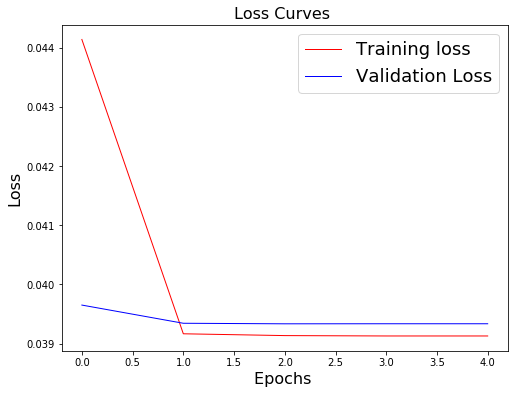

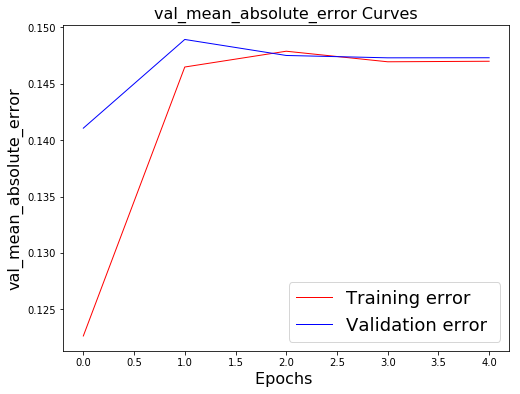

In [5]:
import p7_util

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history)

## <font color=blus>2.1 Switch to classification problem</font>

    Targets, that are coninues values from float type, are converted into classes of integers, such leading to a classification model.
    
    For doing that, y_train_encoded and y_test_encoded are transformed as array of integers, 
    ranging from 0 to 10, leading to 11 classes.

### <font color=blus>2.1.1 Binary classification</font>

Target is splitted based 

`y_train_label` and `y_test_label` are arrays with number of columns as number of classes.

Classes are one-hot-encoded for each observation.

In [ ]:
y_train.min(), y_train.max()
np.round(y_train*1.0, 1).astype(int)

`y_train` and `y_test` are vectors with float values ranging from `0.0` to `1.0`. 

`y_train_label` and `y_test_label` are matrix issued from One-hot-encoding were position of 1 value in a column indicates the class value.

`decimal_count` is the value allowing to take into account the number of decimals when converting continuous values into classes.

In [ ]:
import p9_util
decimal_count=1
nb_classes, y_train_label = p9_util.y_reg_2_label(y_train, decimal_count=decimal_count)
_, y_test_label = p9_util.y_reg_2_label(y_test, decimal_count=decimal_count)

print("\nNumber of classes= {}".format(nb_classes))

`y_train_label_vect` and `y_test_label_vect` are vectors issues from `[N x Classes]` matrix, where `N` is the 
number of samples and `Classes` the number of classes.

After this target conversion, unique column values are classes number, ranged from `0` to `10`.

In [ ]:
import p9_util

y_train_label_vect = np.array([p9_util.get_label_from_row(y_train_label[row]) for row in range(0,len(y_train_label))])
y_test_label_vect  = np.array([p9_util.get_label_from_row(y_test_label[row])  for row in range(0,len(y_test_label))])

`Counter` class from `collection` package is used in order to compute occurencies fo each class in the data-model.

In [ ]:
from collections import Counter

counter_y_train_label_vect = Counter(y_train_label_vect)
counter_y_test_label_vect  = Counter(y_test_label_vect)

print(counter_y_train_label_vect, counter_y_train_label_vect[0]+counter_y_train_label_vect[1])
print(counter_y_test_label_vect, counter_y_test_label_vect[0]+counter_y_test_label_vect[1])

    Diagram below shows classes distribution for train (blue) and test (orange) dataset.

    Both diagrams shows same shape.

In [ ]:
fig = plt.figure(figsize=(5,5))
_=sns.kdeplot(y_train_label_vect, shade=True)
_=sns.kdeplot(y_test_label_vect, shade=True)
fig.legend(labels=['Train classes distribution','Test classes distribution'])
plt.show()

In [ ]:
threshold = 0
direction = 1
y_train_label_bin = multivalue2_binary(y_train_label_vect, threshold, direction)
y_test_label_bin = multivalue2_binary(y_test_label_vect, threshold, direction)

In [ ]:
from collections import Counter
counter_y_train_label_bin = Counter(y_train_label_bin)
counter_y_test_label_bin  = Counter(y_test_label_bin)

print(counter_y_train_label_bin, counter_y_train_label_bin[0]+counter_y_train_label_bin[1])
print(counter_y_test_label_bin, counter_y_test_label_bin[0]+counter_y_test_label_bin[1])

    Split target vector to balance train and test categories.

In [ ]:
split_number = len(y_test_label_bin)
split_number
X_train_split = X_train[:split_number]
y_train_label_bin_split = y_train_label_bin[:split_number]
X_train_split.shape, X_test.shape

In [ ]:
fig = plt.figure(figsize=(5,5))
_=sns.kdeplot(y_train_label_bin_split, shade=True)
_=sns.kdeplot(y_test_label_bin, shade=True)
fig.legend(labels=['Train classes distribution','Test classes distribution'])
plt.show()

#### <font color='blus'>Appying RNN model to binary classification</font>

    Dataset are reshaped inorder to feed Keras RNN.

In [ ]:
import p9_util

X_train_reshape = p9_util.keras_rnn_reshape(X_train_split)
X_test_reshape = p9_util.keras_rnn_reshape(X_test)

For feeding RNN network, `y_train_label_bin_split` and `y_test_label_bin` are converted into matrix where 
number of columns is the number of classes.

In [ ]:
nb_classes, y_train_label_bin_split = p9_util.y_reg_2_label(y_train_label_bin_split, decimal_count=0)
_, y_test_label_bin = p9_util.y_reg_2_label(y_test_label_bin, decimal_count=0)
print(y_train_label_bin_split.shape)
print(y_test_label_bin.shape)


#### <font color=blus>Building GRU model with 1 layer </font>

In [ ]:
lstm_out = 1
cell_units = 16*2
rnn_layers = 1
batch_size = X_train_split.shape[0]//10

import p9_util

rnnCellType = 'GRU'

model = p9_util.keras_rnn_build(rnnCellType, cell_units, max_length, isWordEmbedding=False\
                   , nbClasses=nb_classes, rnn_layers=rnn_layers)

In [ ]:
history = model.fit(X_train_reshape, y_train_label_bin_split, batch_size =batch_size, nb_epoch = 10
                    ,validation_data=(X_test_reshape,y_test_label_bin),  verbose = 1)

#### <font color=blus>Computation of classifications performances</font>

In [ ]:
import p7_util

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend='Binary classification')

In [ ]:
import p9_util
y_= p9_util.display_class_performance(model, X_test_reshape, y_test_label_bin, is_binary=True, y_pred=None)

#### <font color=blus>Building GRU model with 2 layers </font>

In [ ]:
lstm_out = 1
cell_units = 16*2
rnn_layers = 2
batch_size = X_train_split.shape[0]//10

import p9_util

rnnCellType = 'GRU'

model = p9_util.keras_rnn_build(rnnCellType, cell_units, max_length, isWordEmbedding=False\
                   , nbClasses=nb_classes, rnn_layers=rnn_layers)

In [ ]:
history = model.fit(X_train_reshape, y_train_label_bin_split, batch_size =batch_size, nb_epoch = 10
                    ,validation_data=(X_test_reshape,y_test_label_bin),  verbose = 1)

#### <font color=blus>Computation of classifications performances</font>

In [ ]:
import p7_util

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend='Binary classification')

In [ ]:
import p9_util
toxicity_threshold = 0.5
y_train_label = np.where(y_train <= toxicity_threshold, 0, 1)
y_test_label  = np.where(y_test  <= toxicity_threshold, 0, 1)

nb_classes, y_train_label = p9_util.y_reg_2_label(y_train_label)
_, y_test_label = p9_util.y_reg_2_label(y_test_label)


nb_classes = y_train_label.shape[1]
print("\nNumber of classes issued from one hot encoding= {}".format(nb_classes))

In [ ]:
nb_classes = 2
cell_units, max_length,nb_classes

In [ ]:
import p9_util

rnnCellType = 'GRU'

model = p9_util.keras_rnn_build(rnnCellType, cell_units, max_length, isWordEmbedding=False\
                   , nbClasses=nb_classes)

In [ ]:
history = model.fit(X_train_reshape, y_train_label, batch_size =batch_size, nb_epoch = 60
                    ,validation_data=(X_test_reshape,y_test_label),  verbose = 1)

#### <font color=blus>Computation of classifications performances</font>

In [ ]:
import p7_util

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend='Binary classification')

    It can be seen that, even if cost function may continue to decrease, then
    accuracy will not improve.
    This is due to influence of a great number of observations that are toxicity free, considering 
    others observations.

    Toxicity predictions classes are firstly computed from test dataset issued from texts to be tested.
    Target test vector, a [Nx11] matrix, is transformed into a vector of N rows.
    For achieving this, function 
`p9_util.get_label_from_row()` 

    is used for any row from matrix.
    This allows to compute confusion matrix then plot it.

In [ ]:
import p9_util
y_= p9_util.display_class_performance(model, X_test_reshape, y_test_label, is_binary=True, y_pred=y_)

#### <font color='blus'> Use of Adagrad optimizer for binary classification</font>

In [ ]:
import p9_util

rnnCellType = 'GRU'

model = p9_util.keras_rnn_build(rnnCellType, cell_units, max_length, isWordEmbedding=False\
                   , nbClasses=nb_classes, optimizer_name='Adagrad')

In [ ]:
history = model.fit(X_train_reshape, y_train_label, batch_size =batch_size, nb_epoch = 60
                    ,validation_data=(X_test_reshape,y_test_label),  verbose = 1)

#### <font color=blus>Computation of binary classifications performances</font>

In [ ]:
import p7_util

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend='Binary classification')

    Here under, distributions of computed predictions are calculated.

In [ ]:
import p9_util
y_= p9_util.display_class_performance(model, X_test_reshape, y_test_label, is_binary=True, y_pred=None)

### <font color=blus>2.1.2 Multi-label classification</font>

    Classes are created based on range values for toxicity, as following :
        * From 0.0 <= toxicity <= 0.1 class is 0
        * From 0.1 < toxicity  <= 0.2 class is 1
                    ...
        * From 0.9 < toxicity  <= 1.0 class is 10
    
    Leading to 11 classes

In [ ]:
# This is for avoiding to compute prediction again, once already done, in the performance evaluation step function.
y_=None

In [ ]:
import p9_util

nb_classes, y_train_label = p9_util.y_reg_2_label(y_train)
_, y_test_label = p9_util.y_reg_2_label(y_test)
print("\nNumber of classes issued from one hot encoding= {}".format(nb_classes))

In [ ]:
rnnCellType = 'GRU'
cell_units = 16*2
lstm_out = 1
rnn_layers = 2

In [ ]:
import p9_util

max_length = len(X_train[0])
print("\nInput length= {}".format(max_length))
print("Number of units per RNN cell= {}".format(cell_units))

model = p9_util.keras_rnn_build(rnnCellType, cell_units, max_length, isWordEmbedding=False\
                   , nbClasses=nb_classes, optimizer_name='Adagrad')

In [ ]:
batch_size = X_train.shape[0]//10

# This is the size of vector words.
embedding_dim = 100
vocab_size = len(keras_tokenizer.word_index) + 1
print("Vocabulary size= {}".format(vocab_size))
print("Batch size= {}".format(batch_size))
print("Embeddings dimension= {}".format(embedding_dim))


In [ ]:
import numpy as np

X_train_reshape = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshape = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train_reshape.shape)
print(X_test_reshape.shape)

In [ ]:
history = model.fit(X_train_reshape, y_train_label, batch_size =batch_size, nb_epoch = 30
                    ,validation_data=(X_test_reshape,y_test_label),  verbose = 1)

In [ ]:
import keras
import p5_util
core_name = "gru_"+str(rnn_layers)+"layers_"+str(cell_units)+'units_class'

if False :
    model.save("./data/model_"+core_name+".h5")
    p5_util.object_dump(history, "history_"+core_name+".dump")
    p5_util.object_dump(max_length, "max_length_"+core_name+".dump")
    
else :
    model = keras.models.load_model("./data/model_"+core_name+".h5")
    history = p5_util.object_load("history_"+core_name+".dump")
    max_length = p5_util.object_load("max_length_"+core_name+".dump")

print("\nInput data length= {}".format(max_length))
model.summary()

#### <font color=blus>Computation of classifications performances</font>

In [ ]:
import p7_util

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend='Multi-label classification')

    Those curves shows impact from Adagrad compared to SGD.
    
    Adagrad penalize features that are frequently updated and encourage features not frequently updated to 
    learn more, mean, to be updated more frequently.
    
    By learning more, it is expected that sparse features to contribute more to cost function decrease.
    
    This is what curves inference. Decrease of loss function is not driven by free toxicity text only!
    
    For avoiding overfitting, it would be relevant to apply dropout over cells.
    
    Considering training performance model, overfitting reduction is not yet is the agenda.

    Targets vector, [Nx11] matrix, is transformed into a vector of N rows.
    For achieving this, function 
`p9_util.get_label_from_row` 
    
    is used for any row from matrix.
    This allows to compute confusion matrix then plot it.

In [ ]:
import p9_util
y_= p9_util.display_class_performance(model, X_test_reshape, y_test_label, is_binary=False, y_pred=y_)

### <font color=blus>2.1.3. Overfiting study : LinearSVC</font>

    Turn float values from target vectors into classes

In [ ]:
import p9_util

nb_classes, y_train_label = p9_util.y_reg_2_label(y_train)
_, y_test_label = p9_util.y_reg_2_label(y_test)
print("\nNumber of classes issued from one hot encoding= {}".format(nb_classes))

    Turn target values shaped as a matrix [N,11] into vector of dimension N.
    11 above is the number of classes.

In [ ]:
import p9_util

#--------------------------------------------------------------
# Use of function get_label_from_row
#--------------------------------------------------------------
y_train_label_row = [p9_util.get_label_from_row(y_train_label[row], indicator=1) for row in range(0,len(y_train_label))]
y_test_label_row  = [p9_util.get_label_from_row(y_test_label[row], indicator=1) for row in range(0,len(y_test_label))]

y_train_label_row = np.array(y_train_label_row)
y_test_label_row = np.array(y_test_label_row)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#-----------------------------------------------------------------
# Display prediction classes ditribution
#-----------------------------------------------------------------
fig = plt.figure(figsize=(5,5))
_=sns.kdeplot(y_train_label_row, shade=True)
_=sns.kdeplot(y_test_label_row, shade=True)
fig.legend(labels=['Train classes distribution','Test classes distribution'])
plt.show()

    Train and test distributions have same shape

In [ ]:
from sklearn import svm
model = svm.LinearSVC()
X_train.shape

In [ ]:
model = model.fit(X_train, y_train_label_row)

In [ ]:
import p5_util
core_name = "linearSVC"

if False :
    p5_util.object_dump(model, "./data/model_"+core_name+".dump")    
else :
    model = p5_util.object_load("./data/model_"+core_name+".dump")


#### <font color=blus>Classifications performances</font>

In [ ]:
from collections import Counter
#print('Training target statistics: {}'.format(Counter(y_test_label_row)))
#print('Testing target statistics: {}'.format(Counter(y_test_label_row)))
#print('Predicted target statistics: {}'.format(Counter(y_pred_label)))

counter_y_test_label_row = Counter(y_test_label_row)
print((counter_y_test_label_row))
#for label, count in counter_y_test_label_row.items():
#    print(label, count)



In [ ]:
from imblearn.pipeline import make_pipeline

In [ ]:
len(y_test_label_row), len(y_pred_label)
y_pred_label

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#-----------------------------------------------------------------
# Display prediction classes ditribution
#-----------------------------------------------------------------
fig = plt.figure(figsize=(5,5))
_=sns.kdeplot(y_pred_label, shade=True)
#_=sns.kdeplot(y_test_label_row, shade=True)
fig.legend(labels=['Predict classes distribution','Test classes distribution'])
plt.show()

In [ ]:
arr_index = np.where(y_pred_label != 0)[0]
print(len(arr_index))
_=plt.hist(y_pred_label[arr_index])

In [ ]:
arr_index = np.where(y_test_label_row > 0)[0]
print(len(arr_index))
_ = plt.hist(y_test_label_row[arr_index])

In [ ]:
print(len(np.where(y_pred_label == 0)[0]))
print(len(np.where(y_pred_label == 2)[0]))
print()
print(len(np.where(y_pred_label == 0)[0]))
print(len(np.where(y_pred_label == 2)[0]))

y_pred_label = y_pred_label.astype(int)

In [ ]:
_=sns.kdeplot(y_test_label_row, shade=True)

In [ ]:
mean_acc = model.score(X_test, y_test_label_row)
print("\nLinear SVC : mean accuracy= {}".format(np.round(mean_acc,2)))

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import p4_util

#--------------------------------------------------------------
# Compute confusion matrix
#--------------------------------------------------------------
list_classes = [label for label in range(0,nb_classes)]
print("\nConfusion matrix for all classes : ")
print()
print(metrics.confusion_matrix(y_test_label_row, y_pred_label, labels=list_classes))
print()

cm = confusion_matrix(y_test_label_row, y_pred_label)
p4_util.plot_confusion_matrix(cm, list_classes,
                          normalize=True,
                          title='Confusion matrix with SGD ',
                          cmap=plt.cm.Blues)


    Predictions capacity of LinerSVC is too poor.
    Selection of a simpler classifier, a linear one, for improve overfiting lead to worst performances.
    
    There is no linear relationships between features in the dataset.
    
    Neural networks, because of their ability to capture non linear relationships, have a good position 
    to provide the bests perfromances.

### <font color=blus>2.1.4. Processing imbalanced classes</font>

In [ ]:
import p9_util

cell_units = 16
max_length = len(X_train[0])
print("\nInput length= {}".format(max_length))
print("Number of units per RNN cell= {}".format(cell_units))

rnnCellType = 'GRU'
model = p9_util.keras_rnn_build(rnnCellType, cell_units, max_length, isWordEmbedding=False\
                   , nbClasses=nb_classes)

In [ ]:
nb_classes = y_train_label.shape[1]
nb_classes

    In order to define an under-sampling strategy, let's count the number of elements per class : 

In [ ]:
import p9_util
dict_label_count = p9_util.count_multi_label(y_train_label, axis=1)
print(dict_label_count.items())

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0, ratio=dict_label_count)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train_label)
print(y_resampled.shape, X_resampled.shape)

In [ ]:
y_resampled_sample = y_resampled
X_resampled_sample = X_resampled
X_resampled_sample.shape, y_resampled_sample.shape

In [ ]:
label = np.where(y_train_label[10]==1)[0][0]
y_train_num_label = [np.where(y_train_label[col]==1)[0][0] for col  ]

In [ ]:
dict_label_arrindex = {label:arrindex for (label,arrindex) in [(label, np.where(y_train_label==label)[0]) for label in range(0,nb_classes)]}


In [ ]:
dict_label_arrindex[6]

In [ ]:
row=10
print(y_train_label[row])
np.where(y_train_label[row]==1)[0][0]

In [ ]:
len(y_train_label),y_train_label.shape

In [ ]:
def get_label_from_row(y_row) :
    label = np.where(y_row==1)[0][0]
    return label

In [ ]:
import p9_util
row=10
p9_util.get_label_from_row(y_train_label[row])

    Plot 2 classes versus rest

In [ ]:
list_color = ['#ef8a62' if get_label_from_row(y_train_label[row]) == 0 else '#f7f7f7' if get_label_from_row(y_train_label[row]) == 1 else '#67a9cf' for row in range(0,len(y_train_label))]

In [ ]:
print(y_train_label.shape, X_train.shape)


In [ ]:
import seaborn as sns

_ = sns.kdeplot(y_train_label, shade=True)

In [ ]:
batch_size = X_resampled.shape[0]//10
print("Batch size= {}".format(batch_size))

In [ ]:
import numpy as np

X_train_reshape = np.reshape(X_resampled, (X_resampled.shape[0], 1, X_resampled.shape[1]))
X_test_reshape = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

print(X_train_reshape.shape)
print(X_test_reshape.shape)

In [ ]:
history = model.fit(X_train_reshape, y_resampled, batch_size =batch_size, nb_epoch = 30
                    ,validation_data=(X_test_reshape,y_test_label),  verbose = 1)

In [ ]:
import p7_util

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history)

# <font color=blus>3. Modeling with RNN with embeddings</font>

    Embedding keras layer is used; such layer takes into accoung corpus vocabulary.
    Weights are initialized randomly then will be trained and embeddings will be learned.
    Embeddings are vector that represent a word and vector position relative to other 
    vectors represents its meaningfull.
    
    At the end of the training step, each word from train dataset will be represented as a 
    vector of embeddings.